# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
from api_keys import weather_api_key


file = "../output_data/cities.csv"
file_df = pd.read_csv(file)
file_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [2]:
len(file_df['City'])

548

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
city_data = file_df['City']
city_data_box = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={weather_api_key}&units=Ostrovnoy&q="
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []
cities = []

number = 1
set = 1

# response = requests.get(query_url).json()
# response

print("Beginning Data Retrieval")
print("-------------------------------")

for city in city_data:
    
    response = requests.get(query_url + city).json()
    #data_response = response[0]['name']
    
    if number ==51:
        number = 1
        set = set + 1

    print(f"Processing Record {number} of Set {set} : {response['name']}")
    number = number + 1
    try:
        response = requests.get(query_url + city).json()
        cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
            print("City not found.")
            
            
            
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")



Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 : Ostrovnoy
Processing Record 2 of Set 1 : Mahébourg
Processing Record 3 of Set 1 : Qaanaaq
Processing Record 4 of Set 1 : Zhuhai
Processing Record 5 of Set 1 : Cape Town
Processing Record 6 of Set 1 : Atuona
Processing Record 7 of Set 1 : Flinders
Processing Record 8 of Set 1 : Opuwo
Processing Record 9 of Set 1 : Tiksi
Processing Record 10 of Set 1 : Pushkinskiye Gory
Processing Record 11 of Set 1 : Aykhal
Processing Record 12 of Set 1 : Castro
Processing Record 13 of Set 1 : Avarua
Processing Record 14 of Set 1 : Saskylakh
Processing Record 15 of Set 1 : Constitución
Processing Record 16 of Set 1 : Albany
Processing Record 17 of Set 1 : Vilyuysk
Processing Record 18 of Set 1 : Ushuaia
Processing Record 19 of Set 1 : Bambous Virieux
Processing Record 20 of Set 1 : Kodinsk
Processing Record 21 of Set 1 : Teknāf
Processing Record 22 of Set 1 : Busselton
Processing Record 23 of Set 1 : Ambon City
Proce

Processing Record 48 of Set 4 : Coquimbo
Processing Record 49 of Set 4 : Grand Baie
Processing Record 50 of Set 4 : Kaabong
Processing Record 1 of Set 5 : Lázaro Cárdenas
Processing Record 2 of Set 5 : Luanda
Processing Record 3 of Set 5 : Río Gallegos
Processing Record 4 of Set 5 : Namatanai
Processing Record 5 of Set 5 : Severo-Kuril'sk
Processing Record 6 of Set 5 : Hutang
Processing Record 7 of Set 5 : Namioka
Processing Record 8 of Set 5 : Mnogovershinnyy
Processing Record 9 of Set 5 : San Rafael del Sur
Processing Record 10 of Set 5 : Paamiut
Processing Record 11 of Set 5 : Ribeira Grande
Processing Record 12 of Set 5 : Labuhan
Processing Record 13 of Set 5 : Mount Gambier
Processing Record 14 of Set 5 : Pesca
Processing Record 15 of Set 5 : Mount Isa
Processing Record 16 of Set 5 : Le Port
Processing Record 17 of Set 5 : Hobart
Processing Record 18 of Set 5 : Dublin
Processing Record 19 of Set 5 : Salalah
Processing Record 20 of Set 5 : Beisfjord
Processing Record 21 of Set 5 : 

Processing Record 46 of Set 8 : Half Moon Bay
Processing Record 47 of Set 8 : Nelson Bay
Processing Record 48 of Set 8 : Tuatapere
Processing Record 49 of Set 8 : Grindavik
Processing Record 50 of Set 8 : Xining
Processing Record 1 of Set 9 : Kieta
Processing Record 2 of Set 9 : Kalabo
Processing Record 3 of Set 9 : Sambava
Processing Record 4 of Set 9 : Wawa
Processing Record 5 of Set 9 : Manama
Processing Record 6 of Set 9 : Labuan
Processing Record 7 of Set 9 : Wexford
Processing Record 8 of Set 9 : Kyren
Processing Record 9 of Set 9 : Boquira
Processing Record 10 of Set 9 : Bathsheba
Processing Record 11 of Set 9 : Ogbomosho
Processing Record 12 of Set 9 : Longyearbyen
Processing Record 13 of Set 9 : Diu
Processing Record 14 of Set 9 : Shebalino
Processing Record 15 of Set 9 : Kalat
Processing Record 16 of Set 9 : Hare Bay
Processing Record 17 of Set 9 : Kirkuk
Processing Record 18 of Set 9 : Tabou
Processing Record 19 of Set 9 : Ahipara
Processing Record 20 of Set 9 : Byron Bay
Pr

In [24]:
print(len(lat))
print(len(temp))
print(len(temp_max))
print(len(humidity))
print(len(wind_speed))
print(len(lon))
print(len(date))
print(len(country))
print(len(cloudiness))
print(len(cities))

548
548
548
548
548
548
548
548
548
548


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date })



In [26]:
df.describe()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.502682,22.445383,59.827391,74.713504,51.917883,7.491569,1.603331e+09
std,33.404202,91.906444,20.553700,19.103682,39.096592,5.043528,1.040489e+02
min,-54.800000,-175.200000,-2.200000,10.000000,0.000000,0.160000,1.603330e+09
25%,-6.475000,-62.062500,45.040000,66.000000,6.000000,3.560000,1.603331e+09
50%,20.880000,25.675000,64.560000,78.500000,57.500000,6.390000,1.603331e+09
75%,47.895000,108.172500,77.000000,88.000000,90.000000,10.290000,1.603331e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,30.740000,1.603331e+09


In [27]:
df.to_csv("../output_data/describe_data.csv", index=False)

data_show = pd.read_csv("../output_data/describe_data.csv")

data_show.head()

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.05,39.51,29.39,97,98,5.75,RU,1603330459
1,Mahébourg,-20.41,57.70,73.40,78,40,10.29,MU,1603330460
2,Qaanaaq,77.48,-69.36,20.17,85,100,6.58,GL,1603330460
3,Zhuhai,22.28,113.57,73.40,69,20,23.04,CN,1603330461
4,Cape Town,-33.93,18.42,59.00,87,0,14.99,ZA,1603330461


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
new_lat = []
new_temp = []
new_temp_max = []
new_humidity = []
new_wind_speed = []
new_lon = []
new_date = []
new_country = []
new_cloudiness = []
new_cities = []

number = 0
for x in df["Humidity"]:
    
    if x < 100:
        new_cities.append(df['City'][number])
        new_lat.append(df['Lat'][number])
        new_lon.append(df['lng'][number])
        new_temp_max.append(df['Max Temp'][number])
        new_humidity.append(df['Humidity'][number])
        new_wind_speed.append(df['Wind Speed'][number])
        new_date.append(df['Date'][number])
        new_country.append(df['Country'][number])
        new_cloudiness.append(df['Cloudiness'][number])
    number = number + 1

new_df = pd.DataFrame({
    "City": new_cities,
    "Lat": new_lat,
    "lng": new_lon,
    "Max Temp": new_temp_max,
    "Humidity": new_humidity,
    "Cloudiness": new_cloudiness,
    "Wind Speed": new_wind_speed,
    "Country": new_country,
    "Date": new_date })

new_df

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.05,39.51,29.39,97,98,5.75,RU,1603330459
1,Mahébourg,-20.41,57.70,73.40,78,40,10.29,MU,1603330460
2,Qaanaaq,77.48,-69.36,20.17,85,100,6.58,GL,1603330460
3,Zhuhai,22.28,113.57,73.40,69,20,23.04,CN,1603330461
4,Cape Town,-33.93,18.42,59.00,87,0,14.99,ZA,1603330461
...,...,...,...,...,...,...,...,...,...
526,Perth,-31.93,115.83,64.99,52,20,10.29,AU,1603330703
527,Yabrūd,33.97,36.66,55.00,76,0,3.36,SY,1603330739
528,Verāval,20.90,70.37,81.01,78,1,11.07,IN,1603330740
529,Novyy Urgal,51.07,132.56,40.41,71,73,9.04,RU,1603330740


In [9]:
new_df.describe()

,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
mean,18.889075,24.678434,288.945170,72.498113,53.220755,3.636170,1.603167e+09
std,33.677996,91.785932,11.230152,20.253147,37.996646,2.710614,8.760358e+01
min,-54.800000,-175.200000,261.910000,10.000000,0.000000,0.130000,1.603166e+09
25%,-8.135000,-58.445000,280.150000,61.000000,16.000000,1.500000,1.603167e+09
50%,20.460000,28.390000,290.930000,77.500000,59.000000,3.000000,1.603167e+09
75%,48.427500,110.922500,298.710000,88.000000,90.000000,5.042500,1.603167e+09
max,78.220000,179.320000,311.150000,99.000000,100.000000,19.500000,1.603167e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

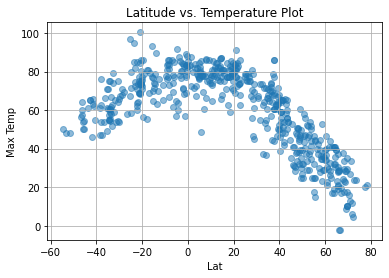

In [29]:
x_axis = new_df['Lat']
y_axis = new_df['Max Temp']
fig1, ax1 = plt.subplots()
plt.scatter(x_axis, y_axis, alpha = 0.5)
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature Plot")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

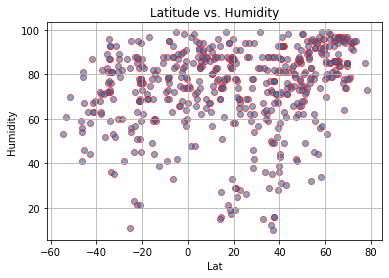

In [30]:
x_axis = new_df['Lat']
y_axis = new_df['Humidity']
fig1, ax1 = plt.subplots()
plt.scatter(x_axis, y_axis, alpha = 0.6, edgecolors = "red")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

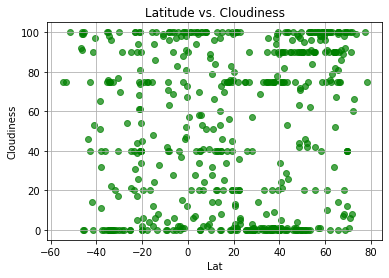

In [31]:
x_axis = new_df['Lat']
y_axis = new_df['Cloudiness']
fig1, ax1 = plt.subplots()
plt.scatter(x_axis, y_axis, alpha = 0.7, color = "green")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

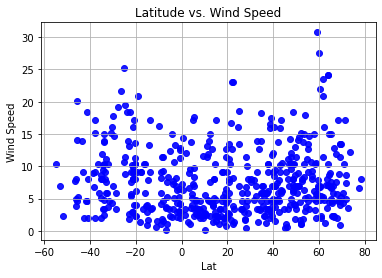

In [32]:
x_axis = new_df['Lat']
y_axis = new_df['Wind Speed']
fig1, ax1 = plt.subplots()
plt.scatter(x_axis, y_axis, alpha = 0.9, color = "blue")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")
plt.grid()
plt.show()

## Linear Regression

In [33]:
# (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept

north_hem = new_df.loc[new_df['Lat'] >= 0]
south_hem = new_df.loc[new_df['Lat'] < 0 ]

north_hem

,City,Lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.05,39.51,29.39,97,98,5.75,RU,1603330459
2,Qaanaaq,77.48,-69.36,20.17,85,100,6.58,GL,1603330460
3,Zhuhai,22.28,113.57,73.40,69,20,23.04,CN,1603330461
8,Tiksi,71.69,128.87,11.82,94,100,5.01,RU,1603330463
9,Pushkinskiye Gory,57.02,28.91,42.57,95,100,8.43,RU,1603330463
...,...,...,...,...,...,...,...,...,...
525,Tamworth,52.63,-1.70,51.80,93,75,8.05,GB,1603330738
527,Yabrūd,33.97,36.66,55.00,76,0,3.36,SY,1603330739
528,Verāval,20.90,70.37,81.01,78,1,11.07,IN,1603330740
529,Novyy Urgal,51.07,132.56,40.41,71,73,9.04,RU,1603330740


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is -0.8887835992309797


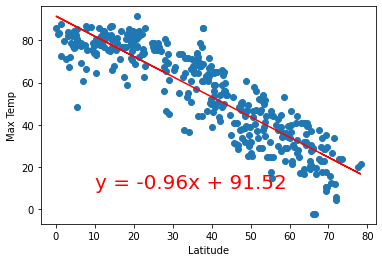

In [37]:
x_axis = north_hem['Lat']
y_axis = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (10,10),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"r-value is {rvalue}")
plt.show()

In [35]:
line_eq

'y = -0.96x + 91.52'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is 0.6309344533349833


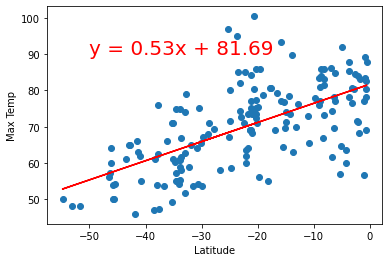

In [38]:
x_axis = south_hem['Lat']
y_axis = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,90),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"r-value is {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is 0.20467178626631047


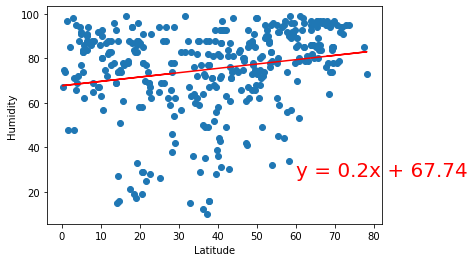

In [39]:
x_axis = north_hem['Lat']
y_axis = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (60,27),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is 0.19020787425488506


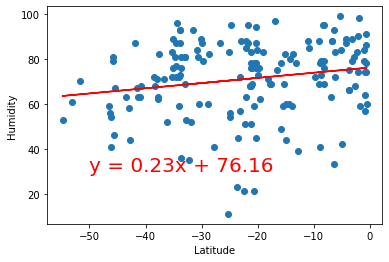

In [40]:
x_axis = south_hem['Lat']
y_axis = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,30),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"r-value is {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is 0.22299507999411022


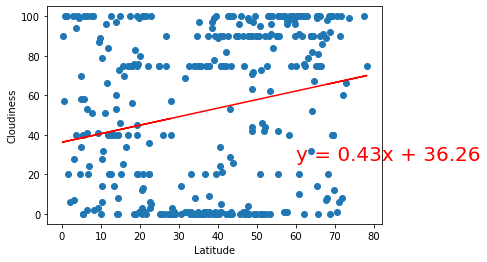

In [41]:
x_axis = north_hem['Lat']
y_axis = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (60,27),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is 0.042348754929458186


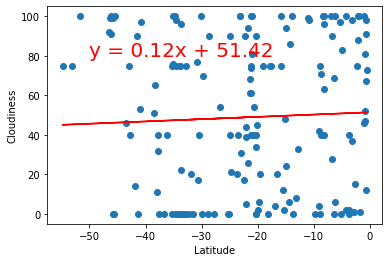

In [42]:
x_axis = south_hem['Lat']
y_axis = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,80),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"r-value is {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is 0.18276099420496408


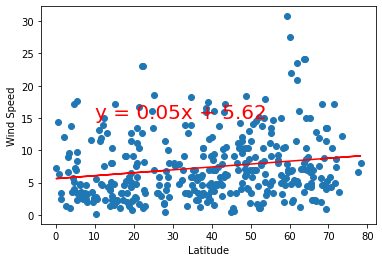

In [43]:
x_axis = north_hem['Lat']
y_axis = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (10,15),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"r-value is {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is -0.18010787769704725


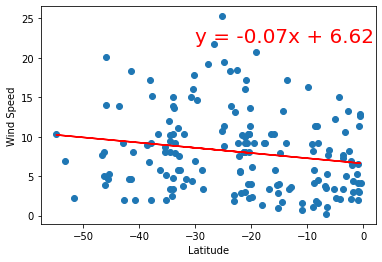

In [45]:
x_axis = south_hem['Lat']
y_axis = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-30,22),fontsize= 20, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"r-value is {rvalue}")
plt.show()